In [4]:
import os
import sys
sys.path.append(os.path.abspath("../../src/"))
from reader import *
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from tools import PDFs
import matplotlib.pyplot as plt
import lhapdf
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, NullFormatter)
#plt.rc('text', usetex=True)
#plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

# Get a nice bar plot


Chi2 total :  2593.636038476679
Chi2 w/o penalty :  2559.0712873522602


<Figure size 1440x288 with 0 Axes>

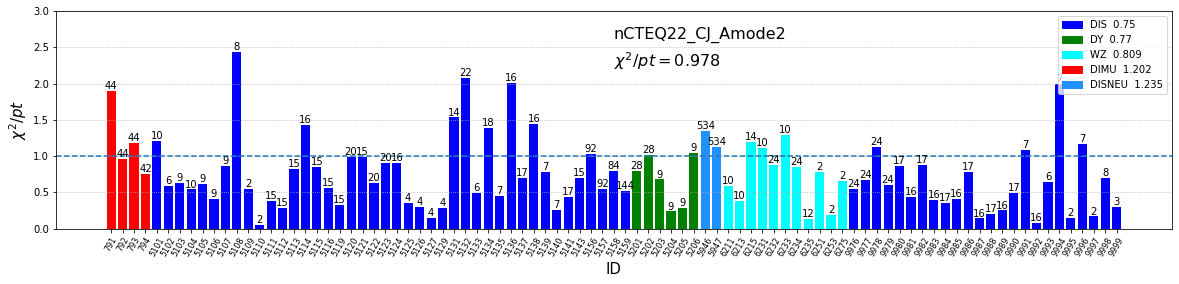

In [30]:
dt = DataSets("BaseRes/Base_CJ_Amode2.yaml")
fitname ="nCTEQ22_CJ_Amode2"
idList = dt.IDlist
idList.sort()
index = np.arange(len(idList))
chi2dof_perid =[]
N_perid = []
colors = []
for id in idList : 
    d = dt.datasets[id] 
    chi2dof_perid.append(d.chi2dof)
    N_perid.append(d.N)
    if id in [791, 792, 793, 794]:
        colors.append("red") #DIMU
    elif id <= 4999 and id >=4000 :
        colors.append("yellow")#SIH
    elif (id <5200 and id >=5000) or (id <=10000  and id>=9900) :
        colors.append("blue")#DIS
    elif id <5300 and id >=5200 :
        colors.append("green")#DY
    elif id <5999 and id>=5900 :
        colors.append("dodgerblue")#DISNEU
    elif id>=6000:
        colors.append("cyan")#WZ
    else : 
        pass



labelColors = ["blue","green", "cyan", "red",  "dodgerblue"]
#labelColors = ["blue","green", "yellow", "cyan"]
labels = ["DIS  " +str(round( dt.filterByExp("DIS")[3], 3)),
            "DY  "+str(round(dt.filterByExp("DY")[3],3)), 
            #"SIH " +str(round(dt.filterByExp("SIH")[3], 3)),
            "WZ  " +str(round(dt.filterByExp("WZPROD")[3], 3)),
             "DIMU  " +str(round(dt.filterByExp("DISDIMU")[3], 3)),
             "DISNEU  "+str(round(dt.filterByExp("DISNEU")[3], 3)),
            ]

        
handles = [plt.Rectangle((0,0),1,1, color=labelColors[i]) for i in range(len(labelColors))]
plt.figure(figsize=(20,4))
fig, ax = plt.subplots(figsize=(20,4))
ax.axhline(1.0, linestyle="dashed")
barPlot = ax.bar(index, chi2dof_perid, color = colors)

for num, rect in zip(N_perid, barPlot):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, num, ha='center', va='bottom',  fontsize=10)
    
# add information on fitname
plt.gca().text(0.5, 0.93, fitname , transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
# add information on total chi2/dof
plt.gca().text(0.5, 0.82, "$\chi^2/pt={}$".format(round(dt.chi2dof, 3)), transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.xlabel("ID", fontsize=15)
plt.ylabel('$\chi^2/pt$', fontsize=15)
plt.xticks(index, idList, fontsize=8, rotation=60)
#plt.title('Chi2/dof per dataset', fontsize=15 )
plt.legend(handles, labels, loc="upper right")
plt.grid(True, axis="y", zorder=0, linestyle="dotted")
plt.ylim(0,3.0)

plt.savefig('chi2dof_'+fitname+'.pdf', bbox_inches='tight')
plt.show()

Chi2 total :  2878.6326632015034
Chi2 w/o penalty :  2836.6663889433303


<Figure size 1440x288 with 0 Axes>

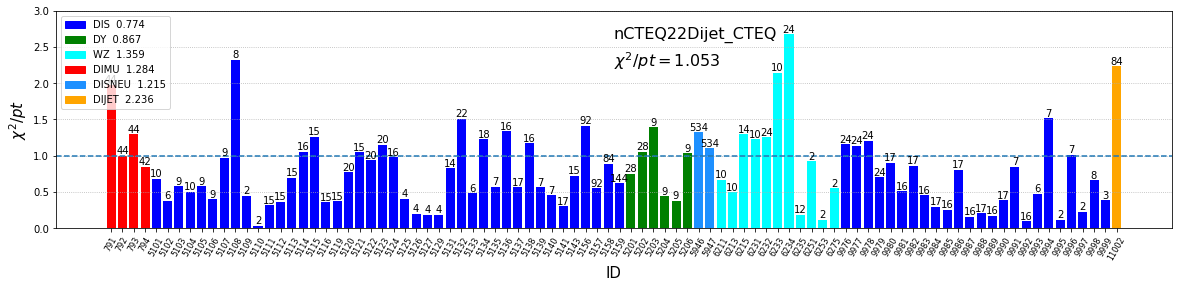

In [31]:
dt = DataSets("BaseRes/BaseDijet_CTEQ.yaml")
fitname ="nCTEQ22Dijet_CTEQ"
idList = dt.IDlist
idList.sort()
index = np.arange(len(idList))
chi2dof_perid =[]
N_perid = []
colors = []
for id in idList : 
    d = dt.datasets[id] 
    chi2dof_perid.append(d.chi2dof)
    N_perid.append(d.N)
    if id in [791, 792, 793, 794]:
        colors.append("red") #DIMU
    elif id <= 4999 and id >=4000 :
        colors.append("yellow")#SIH
    elif (id <5200 and id >=5000) or (id <=10000  and id>=9900) :
        colors.append("blue")#DIS
    elif id <5300 and id >=5200 :
        colors.append("green")#DY
    elif id <5999 and id>=5900 :
        colors.append("dodgerblue")#DISNEU
    elif id>=6000 and id<7000 :
        colors.append("cyan")#WZ
    elif id >=11000 : 
        colors.append("orange") #dijet
    else : 
        pass



labelColors = ["blue","green", "cyan", "red",  "dodgerblue", "orange"]
#labelColors = ["blue","green", "yellow", "cyan"]
labels = ["DIS  " +str(round( dt.filterByExp("DIS")[3], 3)),
            "DY  "+str(round(dt.filterByExp("DY")[3],3)), 
            #"SIH " +str(round(dt.filterByExp("SIH")[3], 3)),
            "WZ  " +str(round(dt.filterByExp("WZPROD")[3], 3)),
             "DIMU  " +str(round(dt.filterByExp("DISDIMU")[3], 3)),
             "DISNEU  "+str(round(dt.filterByExp("DISNEU")[3], 3)),
             "DIJET  "+str(round(dt.filterByExp("DIJET")[3], 3)),
            ]

        
handles = [plt.Rectangle((0,0),1,1, color=labelColors[i]) for i in range(len(labelColors))]
plt.figure(figsize=(20,4))
fig, ax = plt.subplots(figsize=(20,4))
ax.axhline(1.0, linestyle="dashed")
barPlot = ax.bar(index, chi2dof_perid, color = colors)

for num, rect in zip(N_perid, barPlot):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, num, ha='center', va='bottom',  fontsize=10)
    
# add information on fitname
plt.gca().text(0.5, 0.93, fitname , transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
# add information on total chi2/dof
plt.gca().text(0.5, 0.82, "$\chi^2/pt={}$".format(round(dt.chi2dof, 3)), transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.xlabel("ID", fontsize=15)
plt.ylabel('$\chi^2/pt$', fontsize=15)
plt.xticks(index, idList, fontsize=8, rotation=60)
#plt.title('Chi2/dof per dataset', fontsize=15 )
plt.legend(handles, labels, loc="upper left")
plt.grid(True, axis="y", zorder=0, linestyle="dotted")
plt.ylim(0,3.0)

plt.savefig('chi2dof_'+fitname+'.pdf', bbox_inches='tight')
plt.show()

Chi2 total :  1008.1084016762371
Chi2 w/o penalty :  987.879622892508


<Figure size 1440x288 with 0 Axes>

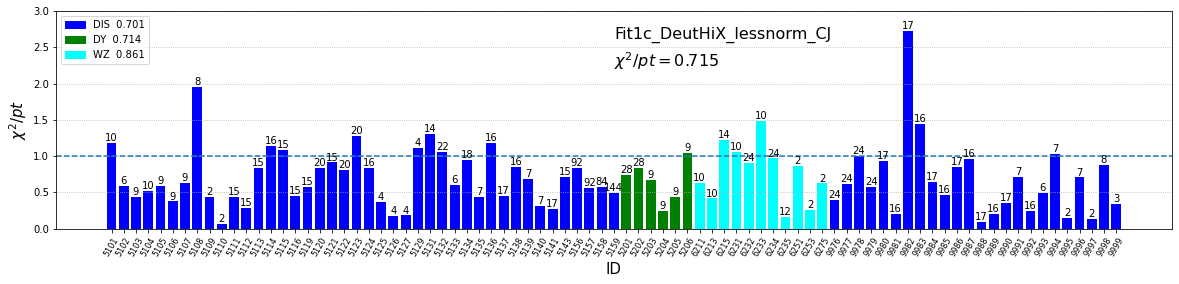

In [37]:
dt = DataSets("Fit1/Fit1c.yaml")
fitname ="Fit1c_DeutHiX_lessnorm_CJ"
idList = dt.IDlist
idList.sort()
index = np.arange(len(idList))
chi2dof_perid =[]
N_perid = []
colors = []
for id in idList : 
    d = dt.datasets[id] 
    chi2dof_perid.append(d.chi2dof)
    N_perid.append(d.N)
    if id in [791, 792, 793, 794]:
        colors.append("red") #DIMU
    elif id <= 4999 and id >=4000 :
        colors.append("yellow")#SIH
    elif (id <5200 and id >=5000) or (id <=10000  and id>=9900) :
        colors.append("blue")#DIS
    elif id <5300 and id >=5200 :
        colors.append("green")#DY
    elif id <5999 and id>=5900 :
        colors.append("dodgerblue")#DISNEU
    elif id>=6000 and id<7000 :
        colors.append("cyan")#WZ
    elif id >=11000 : 
        colors.append("orange") #dijet
    else : 
        pass



labelColors = ["blue","green", "cyan"]
#labelColors = ["blue","green", "yellow", "cyan"]
labels = ["DIS  " +str(round( dt.filterByExp("DIS")[3], 3)),
            "DY  "+str(round(dt.filterByExp("DY")[3],3)), 
            #"SIH " +str(round(dt.filterByExp("SIH")[3], 3)),
            "WZ  " +str(round(dt.filterByExp("WZPROD")[3], 3)),
            ]

        
handles = [plt.Rectangle((0,0),1,1, color=labelColors[i]) for i in range(len(labelColors))]
plt.figure(figsize=(20,4))
fig, ax = plt.subplots(figsize=(20,4))
ax.axhline(1.0, linestyle="dashed")
barPlot = ax.bar(index, chi2dof_perid, color = colors)

for num, rect in zip(N_perid, barPlot):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, num, ha='center', va='bottom',  fontsize=10)
    
# add information on fitname
plt.gca().text(0.5, 0.93, fitname , transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
# add information on total chi2/dof
plt.gca().text(0.5, 0.82, "$\chi^2/pt={}$".format(round(dt.chi2dof, 3)), transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.xlabel("ID", fontsize=15)
plt.ylabel('$\chi^2/pt$', fontsize=15)
plt.xticks(index, idList, fontsize=8, rotation=60)
#plt.title('Chi2/dof per dataset', fontsize=15 )
plt.legend(handles, labels, loc="upper left")
plt.grid(True, axis="y", zorder=0, linestyle="dotted")
plt.ylim(0,3.0)

plt.savefig('chi2dof_'+fitname+'.pdf', bbox_inches='tight')
plt.show()

Chi2 total :  1551.981423237215
Chi2 w/o penalty :  1529.0124498082214


<Figure size 1440x288 with 0 Axes>

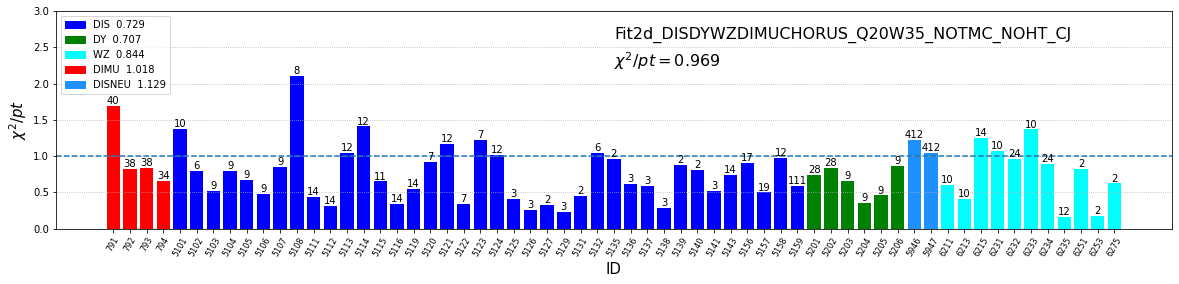

In [42]:
dt = DataSets("Fit2/Fit2d.yaml")
fitname ="Fit2d_DISDYWZDIMUCHORUS_Q20W35_NOTMC_NOHT_CJ"
idList = dt.IDlist
idList.sort()
index = np.arange(len(idList))
chi2dof_perid =[]
N_perid = []
colors = []
for id in idList : 
    d = dt.datasets[id] 
    chi2dof_perid.append(d.chi2dof)
    N_perid.append(d.N)
    if id in [791, 792, 793, 794]:
        colors.append("red") #DIMU
    elif id <= 4999 and id >=4000 :
        colors.append("yellow")#SIH
    elif (id <5200 and id >=5000) or (id <=10000  and id>=9900) :
        colors.append("blue")#DIS
    elif id <5300 and id >=5200 :
        colors.append("green")#DY
    elif id <5999 and id>=5900 :
        colors.append("dodgerblue")#DISNEU
    elif id>=6000 and id<7000 :
        colors.append("cyan")#WZ
    elif id >=11000 : 
        colors.append("orange") #dijet
    else : 
        pass



labelColors = ["blue","green", "cyan", "red",  "dodgerblue"]
#labelColors = ["blue","green", "yellow", "cyan"]
labels = ["DIS  " +str(round( dt.filterByExp("DIS")[3], 3)),
            "DY  "+str(round(dt.filterByExp("DY")[3],3)), 
            #"SIH " +str(round(dt.filterByExp("SIH")[3], 3)),
            "WZ  " +str(round(dt.filterByExp("WZPROD")[3], 3)),
             "DIMU  " +str(round(dt.filterByExp("DISDIMU")[3], 3)),
             "DISNEU  "+str(round(dt.filterByExp("DISNEU")[3], 3)),
            ]

        
handles = [plt.Rectangle((0,0),1,1, color=labelColors[i]) for i in range(len(labelColors))]
plt.figure(figsize=(20,4))
fig, ax = plt.subplots(figsize=(20,4))
ax.axhline(1.0, linestyle="dashed")
barPlot = ax.bar(index, chi2dof_perid, color = colors)

for num, rect in zip(N_perid, barPlot):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, num, ha='center', va='bottom',  fontsize=10)
    
# add information on fitname
plt.gca().text(0.5, 0.93, fitname , transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
# add information on total chi2/dof
plt.gca().text(0.5, 0.82, "$\chi^2/pt={}$".format(round(dt.chi2dof, 3)), transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
plt.xlabel("ID", fontsize=15)
plt.ylabel('$\chi^2/pt$', fontsize=15)
plt.xticks(index, idList, fontsize=8, rotation=60)
#plt.title('Chi2/dof per dataset', fontsize=15 )
plt.legend(handles, labels, loc="upper left")
plt.grid(True, axis="y", zorder=0, linestyle="dotted")
plt.ylim(0,3.0)

plt.savefig('chi2dof_'+fitname+'.pdf', bbox_inches='tight')
plt.show()

# Get Chi2 per expeirment table

In [15]:
#pd.set_option('display.max_rows', 100)
dt = DataSets("Fit2/Fit2c.yaml")
display(dt.getChi2Data())

Chi2 total :  2412.9575684274837
Chi2 w/o penalty :  2385.12173126167


,ID,N,Chi2Tot,Chi2/N
0,791,44,85.939027,1.953160
1,792,44,42.685782,0.970131
2,793,44,55.387312,1.258803
3,794,42,31.865233,0.758696
4,5101,10,7.724540,0.772454
5,5102,6,2.817293,0.469549
6,5103,9,6.339128,0.704348
7,5104,10,5.001270,0.500127
8,5105,9,4.691896,0.521322
9,5106,9,3.207103,0.356345


# How to quickly set parameters in the setting file

In [33]:
file = "settings.yaml"
pars = "0.00423241 -0.10346 -0.142818 -0.885159 -0.00463104 0.0133724 0.196136 0.0335217 -0.0378647 0.0905113 -0.0308533 0.470419 0.0159035 0.0203934 0.00176048 -0.0865231 0.172226 -0.0329323 0.591806 -0.0463543 0.0956192 0.0263882 0.0151367 -0.0373306 0.00612259 -0.0105724 0.118835 0.384336 -1.99316 -2.0986 -0.0202007 -0.0890789 0.746649 0.349394 -0.0908966 0.0908356 0.781527 -0.108381 -0.00656128 -0.0390224"
pars = pars.split(" ")
for i, p in enumerate(pars) : 
    p = float(p)
    pars[i] =p


ostream = open(file)
yout = yaml.safe_load(ostream)
yout["Minimizer"]["FitParams"] 
for i, el in enumerate(yout["Minimizer"]["FitParams"] ): 
    el[1][0] = pars[i]

#yout["Minimizer"]["FitParams"] 